Step Response Characteristics:
RiseTime: 1.0227025347133005
SettlingTime: 3.501981406745544
SettlingMin: 0.905050797782676
SettlingMax: 1.0748369311070607
Overshoot: 7.483693110706069
Undershoot: 1.214626094756697
Peak: 1.0748369311070607
PeakTime: 2.4792788720322436
SteadyStateValue: 1.0


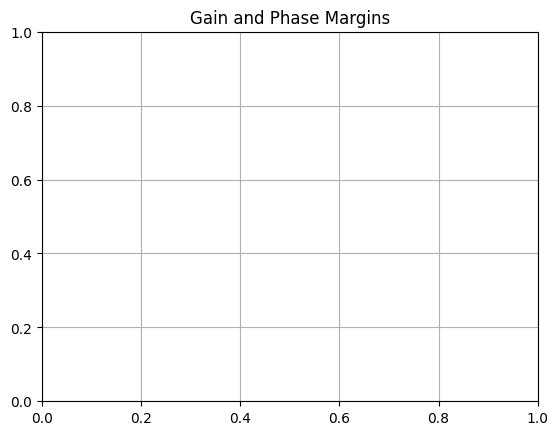

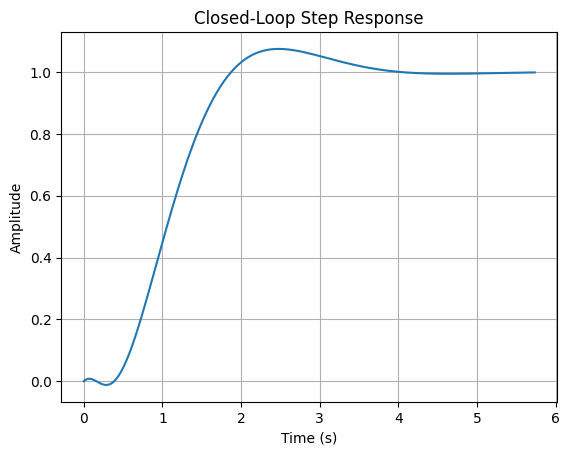

In [2]:
!pip install control
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Define the transfer function variable s
s = ctrl.TransferFunction.s

# Use Padé approximation for the delay term e^{-0.4s}
# Here, we're using a 2nd-order Padé approximation
delay_num, delay_den = ctrl.pade(0.4, 2)  # 0.4 is the delay time
delay_tf = ctrl.TransferFunction(delay_num, delay_den)

# Define the transfer function Ls without the delay
Ls_nominal = 1 / (0.2 * s + 1)

# Incorporate the delay into Ls
Ls = Ls_nominal * delay_tf

# Define the controller Cs
Cs = 0.045 + 1 / s

# Open-loop transfer function (Ls * Cs)
open_loop_tf = Ls * Cs

# Plot gain and phase margins
plt.figure(1)
ctrl.margin(open_loop_tf)
plt.grid(True)
plt.title('Gain and Phase Margins')

# Closed-loop transfer function Ts
Ts = ctrl.feedback(open_loop_tf, 1)

# Step response plot for Ts
plt.figure(2)
time, response = ctrl.step_response(Ts)
plt.plot(time, response)
plt.grid(True)
plt.title('Closed-Loop Step Response')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Step info for Ts
step_info = ctrl.step_info(Ts)
print("Step Response Characteristics:")
for key, value in step_info.items():
    print(f"{key}: {value}")

plt.show()
